In [427]:
import numpy as np
from matplotlib import pyplot as plt

Define the problem parameters


In [428]:
A = np.array([[1, 3], [3, 1]]) # low dimensions to plot it, you can test larger sizes
b = np.array([1.1, 0.2])

The function to be minimized is $\frac{1}{2}\|Ax-b\|_2^2$

In [429]:
f = lambda x: 0.5*np.sum((A @ x - b) ** 2)

# derivative of f from matrix calculus
df = lambda x: A.T @ (A @ x - b)


Plot the function

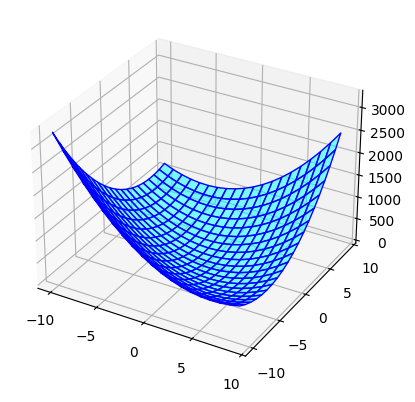

In [430]:
# this function has been prepared only for the visualization sake, no need to go through this but it renders some nice
# graphics :)
F = lambda r1, r2: (r1 * A[0, 0] + r2 * A[0, 1] - b[0]) ** 2 + (r1 * A[1, 0] + r2 * A[1, 1] - b[1]) ** 2
xx, yy = np.meshgrid(np.arange(-10, 10), np.arange(-10, 10))

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.5, facecolor=[0, 1, 1])

Parameters of gradient descent

In [431]:
TOL_GRAD_NORM = 1e-5
MAX_ITER = 100
TOL_DIST = 1e-4
alpha_grid = [0.01, 0.05, 0.1] #  step size.. play with this, the system might get really unstable

Initialization: test different inizializations, the function is convex, you always converge to the same solution

In [432]:
x_inits = np.random.randint(-50, 50, size=(5, 2)) # np.array([-5, 10])
print(x_inits)

grad_norm = 1e10
distanceX = 1e10

# initialize the list with all the estimates
# all_x will be a list of lists of lists: all_x[i][j] holds the history for x_inits[i] and alpha_grid[j]
all_x = [[[x_inits[i].copy()]] for i in range(x_inits.shape[0])]
for i in range(x_inits.shape[0]):
    all_x[i] = [[x_inits[i].copy()] for _ in range(len(alpha_grid))]
print(all_x)


[[ 28  -4]
 [-23  48]
 [-23 -23]
 [-32  16]
 [ 27 -43]]
[[[array([28, -4])], [array([28, -4])], [array([28, -4])]], [[array([-23,  48])], [array([-23,  48])], [array([-23,  48])]], [[array([-23, -23])], [array([-23, -23])], [array([-23, -23])]], [[array([-32,  16])], [array([-32,  16])], [array([-32,  16])]], [[array([ 27, -43])], [array([ 27, -43])], [array([ 27, -43])]]]


Main loop

In [433]:
cnt = 0

for i in range(x_inits.shape[0]):
    for j in range(len(alpha_grid)):
        grad_norm = 1e10
        distanceX = 1e10
        cnt = 0
        # reset to original x_init
        # could track values better, but this works as well
        x_inits[i] = all_x[i][j][0]
        while grad_norm > TOL_GRAD_NORM and cnt < MAX_ITER and distanceX > TOL_DIST:
            cnt = cnt + 1
            # gradient descent step
            x_new = x_inits[i] - alpha_grid[j] * df(x_inits[i])
            # print(f"{x_new} = {x_inits[i]} - {alpha_grid[j]} * {df(x_inits[i])}")
            
            # compute the norm of the gradient for the stopping criteria
            grad_norm = np.linalg.norm(df(x_new))

            # compute the distance between two consecutive iterates for the stopping criteria
            distanceX = np.linalg.norm(x_inits[i] - x_new)

            # store the estimate
            x_inits[i] = x_new
            all_x[i][j].append(x_new)

Plot all the estimates

[array([28, -4]), array([25.457, -5.245]), array([22.817, -5.965]), array([20.117, -5.785]), array([18.317, -5.665]), array([16.517, -5.545]), array([14.717, -5.425]), array([12.917, -5.305]), array([11.117, -5.185]), array([10.217, -5.125]), array([ 9.317, -5.065]), array([ 8.417, -5.005]), array([ 7.517, -4.945]), array([ 6.557, -3.985]), array([ 5.597, -3.025]), array([ 4.697, -2.965]), array([ 3.737, -2.005]), array([ 2.837, -1.945]), array([ 1.877, -0.985]), array([ 0.917, -0.025]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), a

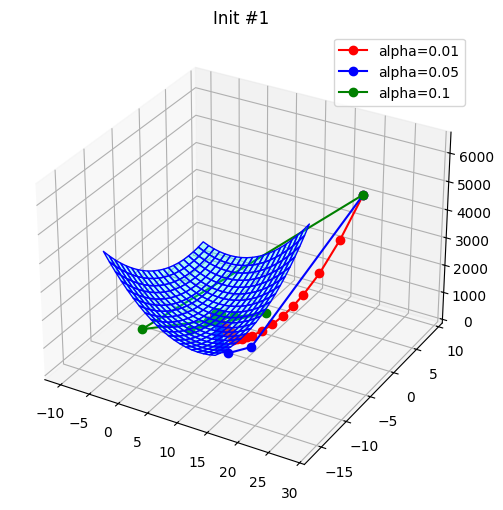

[array([-23,  48]), array([-23.563,  44.615]), array([-23.323,  41.015]), array([-23.143,  38.315]), array([-22.963,  35.615]), array([-21.883,  32.855]), array([-20.803,  30.095]), array([-19.783,  28.235]), array([-18.763,  26.375]), array([-17.743,  24.515]), array([-16.723,  22.655]), array([-15.703,  20.795]), array([-14.683,  18.935]), array([-13.663,  17.075]), array([-12.703,  16.115]), array([-11.743,  15.155]), array([-10.783,  14.195]), array([-9.823, 13.235]), array([-8.863, 12.275]), array([-7.903, 11.315]), array([-6.943, 10.355]), array([-5.983,  9.395]), array([-5.023,  8.435]), array([-4.963,  7.535]), array([-4.003,  6.575]), array([-3.943,  5.675]), array([-2.983,  4.715]), array([-2.023,  3.755]), array([-1.963,  2.855]), array([-1.003,  1.895]), array([-0.943,  0.995]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 

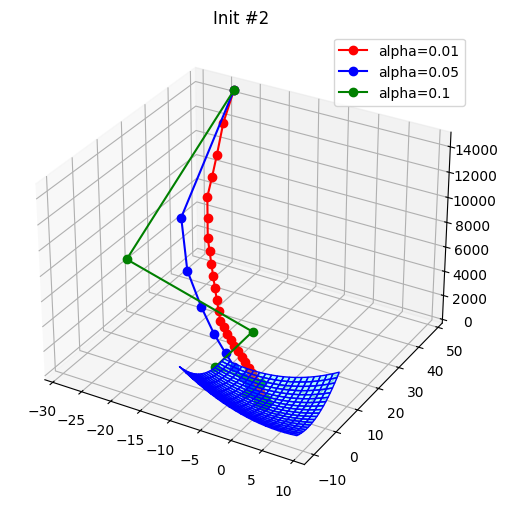

[array([-23, -23]), array([-19.303, -19.285]), array([-15.943, -15.925]), array([-12.583, -12.565]), array([-10.063, -10.045]), array([-8.383, -8.365]), array([-6.703, -6.685]), array([-5.023, -5.005]), array([-4.183, -4.165]), array([-3.343, -3.325]), array([-2.503, -2.485]), array([-1.663, -1.645]), array([-0.823, -0.805]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array

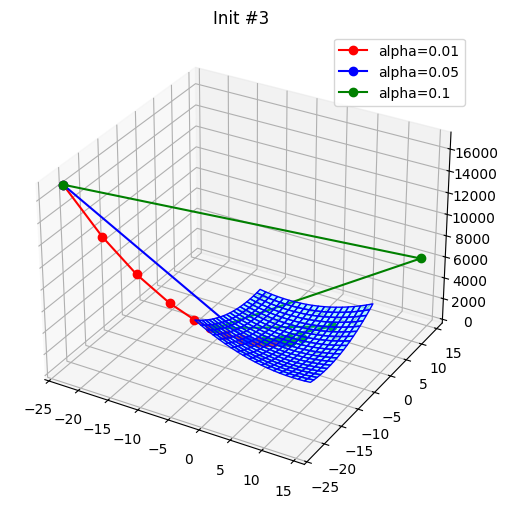

[array([-32,  16]), array([-29.743,  16.355]), array([-27.043,  16.175]), array([-25.243,  16.055]), array([-23.443,  15.935]), array([-21.583,  14.915]), array([-19.723,  13.895]), array([-17.863,  12.875]), array([-16.003,  11.855]), array([-15.043,  10.895]), array([-14.083,   9.935]), array([-13.123,   8.975]), array([-12.163,   8.015]), array([-11.263,   7.955]), array([-10.303,   6.995]), array([-9.343,  6.035]), array([-8.443,  5.975]), array([-7.483,  5.015]), array([-6.583,  4.955]), array([-5.623,  3.995]), array([-4.663,  3.035]), array([-3.763,  2.975]), array([-2.803,  2.015]), array([-1.903,  1.955]), array([-0.943,  0.995]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([

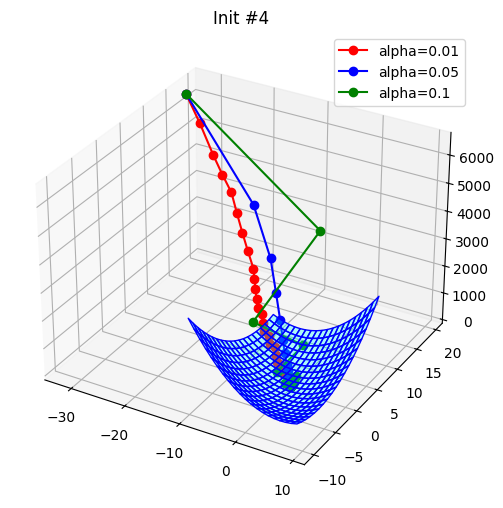

[array([ 27, -43]), array([ 26.897, -40.285]), array([ 25.817, -37.525]), array([ 24.737, -34.765]), array([ 23.657, -32.005]), array([ 22.637, -30.145]), array([ 21.617, -28.285]), array([ 20.597, -26.425]), array([ 19.577, -24.565]), array([ 18.557, -22.705]), array([ 17.537, -20.845]), array([ 16.517, -18.985]), array([ 15.497, -17.125]), array([ 14.537, -16.165]), array([ 13.577, -15.205]), array([ 12.617, -14.245]), array([ 11.657, -13.285]), array([ 10.697, -12.325]), array([  9.737, -11.365]), array([  8.777, -10.405]), array([ 7.817, -9.445]), array([ 6.857, -8.485]), array([ 5.897, -7.525]), array([ 4.937, -6.565]), array([ 3.977, -5.605]), array([ 3.017, -4.645]), array([ 2.957, -3.745]), array([ 1.997, -2.785]), array([ 1.037, -1.825]), array([ 0.977, -0.925]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.017, 0.035]), array([0.0

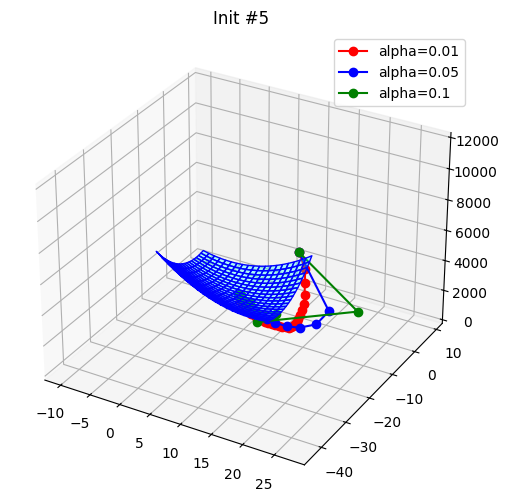

In [434]:
colors = ['red', 'blue', 'green']
for i, x_init in enumerate(x_inits):
    fig = plt.figure(figsize=(8, 6))
    ax = plt.axes(projection='3d')
    ax.plot_surface(xx, yy, F(xx, yy), edgecolor=[0, 0, 1], alpha=0.3, facecolor=[0, 1, 1])
    for j, a in enumerate(alpha_grid):
        realization = all_x[i][j]
        print(realization)
        xxplot = [x[0] for x in realization]
        yyplot = [x[1] for x in realization]
        zzplot = F(np.array(xxplot), np.array(yyplot))
        ax.plot3D(xxplot, yyplot, zzplot, marker='o', color=colors[j % len(colors)], label=f'alpha={a}')
    ax.set_title(f'Init #{i+1}')
    ax.legend()
    plt.show()
